In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [43]:
df = pd.read_csv("road_accident_data.csv")

In [ ]:
df.head()

,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433,Connecticut,2024-02-20 05:46:20,Tuesday,19:59:02,Rainy,Muddy,Daylight,Street,T-Junction,...,2,3,57.0,3.303606,3.139351,485.649011,4.886202,0.904971,45.0,25.152781
1,165434,Massachusetts,2024-01-09 05:08:31,Wednesday,21:28:51,Sunny,Muddy,Daylight,Highway,Intersection,...,1,0,55.0,2.715327,3.634593,616.979936,4.677592,0.949236,41.0,23.163817
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,Snowy,Snowy,Dawn,Street,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
3,165436,Hawaii,2024-01-15 03:23:47,Sunday,16:51:02,Snowy,Icy,Daylight,Street,Intersection,...,5,0,59.0,6.976968,2.334468,842.441019,4.351822,0.195811,NaN,6.595036
4,165437,Oklahoma,2024-02-10 10:17:29,Tuesday,14:19:19,Foggy,Icy,Night,Rural,T-Junction,...,2,0,53.0,3.724599,4.359620,905.620262,6.626862,0.954821,81.0,22.913128


In [ ]:
df.columns

Index(['ID', 'State', 'Date', 'Day_of_Week', 'Time_of_Day',
       'Weather_Conditions', 'Road_Conditions', 'Light_Conditions',
       'Type_of_Road', 'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response'],
      dtype='object')

In [ ]:
len(df)

1610

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1610 non-null   int64  
 1   State                               1610 non-null   object 
 2   Date                                1610 non-null   object 
 3   Day_of_Week                         1610 non-null   object 
 4   Time_of_Day                         1610 non-null   object 
 5   Weather_Conditions                  1461 non-null   object 
 6   Road_Conditions                     1610 non-null   object 
 7   Light_Conditions                    1610 non-null   object 
 8   Type_of_Road                        1610 non-null   object 
 9   Type_of_Junction                    1455 non-null   object 
 10  Type_of_Accident                    1610 non-null   object 
 11  Vehicle_Type                        1610 no

In [ ]:
df.describe()

,ID,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
count,1610.000000,1610.000000,1610.000000,1457.000000,1610.000000,1610.000000,1610.000000,1453.000000,1610.000000,1433.000000,1444.000000
mean,166237.500000,3.062112,1.444099,50.144132,5.062241,5.049247,553.774075,6.537440,0.549663,49.933008,17.771576
std,464.911282,1.412848,1.155813,11.869475,2.890145,2.800700,258.589644,2.011750,0.259722,29.279972,7.245455
min,165433.000000,1.000000,0.000000,30.000000,0.113713,0.100520,100.224514,3.000363,0.100261,0.000000,5.032373
25%,165835.250000,2.000000,0.000000,40.000000,2.549658,2.708608,327.701610,4.773072,0.315058,24.000000,11.501425
50%,166237.500000,3.000000,1.000000,50.000000,5.151083,4.977115,557.361549,6.623199,0.550753,49.000000,17.498544
75%,166639.750000,4.000000,3.000000,60.000000,7.563470,7.474726,781.561590,8.284306,0.774580,76.000000,24.183088
max,167042.000000,5.000000,3.000000,70.000000,9.999620,9.998113,999.931342,9.996583,0.999489,100.000000,29.981212


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

11

In [ ]:
df.isna().sum()

ID                                      0
State                                   0
Date                                    0
Day_of_Week                             0
Time_of_Day                             0
Weather_Conditions                    149
Road_Conditions                         0
Light_Conditions                        0
Type_of_Road                            0
Type_of_Junction                      155
Type_of_Accident                        0
Vehicle_Type                            0
Driver_Age_Group                        0
Num_Vehicles_Involved                   0
Num_Casualties                          0
Speed_Limit                           153
Distance_to_Nearest_Hospital            0
Distance_to_Nearest_Police_Station      0
Visibility                              0
Road_Width                            157
Road_Surface_Friction_Coefficient       0
Vehicle_Speed                         177
Time_Taken_for_Emergency_Response     166
dtype: int64

In [ ]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage

Vehicle_Speed                         10.993789
Time_Taken_for_Emergency_Response     10.310559
Road_Width                             9.751553
Type_of_Junction                       9.627329
Speed_Limit                            9.503106
Weather_Conditions                     9.254658
Num_Vehicles_Involved                  0.000000
Road_Surface_Friction_Coefficient      0.000000
Visibility                             0.000000
Distance_to_Nearest_Police_Station     0.000000
Distance_to_Nearest_Hospital           0.000000
Num_Casualties                         0.000000
ID                                     0.000000
Driver_Age_Group                       0.000000
State                                  0.000000
Type_of_Accident                       0.000000
Type_of_Road                           0.000000
Light_Conditions                       0.000000
Road_Conditions                        0.000000
Time_of_Day                            0.000000
Day_of_Week                            0

In [ ]:
missing_percentage[missing_percentage !=0]

Vehicle_Speed                        10.993789
Time_Taken_for_Emergency_Response    10.310559
Road_Width                            9.751553
Type_of_Junction                      9.627329
Speed_Limit                           9.503106
Weather_Conditions                    9.254658
dtype: float64

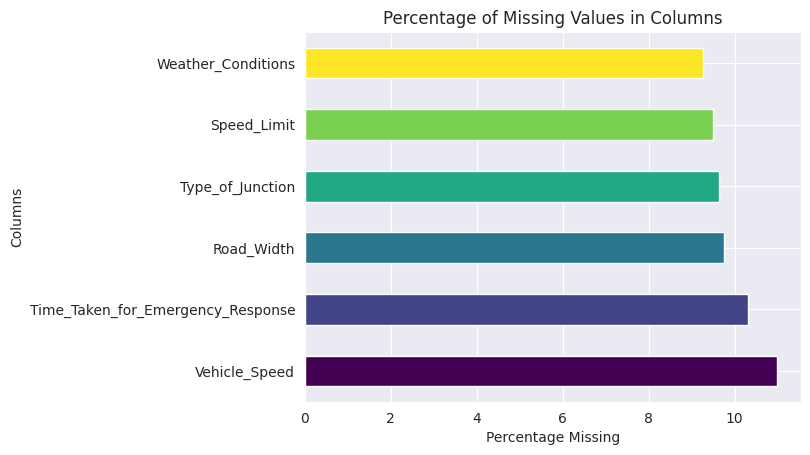

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(missing_percentage[missing_percentage != 0])))

missing_percentage[missing_percentage != 0].plot(kind="barh", color=colors)
plt.xlabel('Percentage Missing')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Columns')
plt.show()

In [ ]:
states = df.State.unique()
len(states)

50

In [ ]:
states_by_accident = df.State.value_counts()
states_by_accident

State
Hawaii            47
Maryland          45
South Dakota      41
Colorado          41
Wyoming           39
Mississippi       39
Utah              39
Alaska            38
South Carolina    37
Florida           37
Oklahoma          36
West Virginia     36
Maine             36
Arizona           35
Missouri          35
Washington        35
Vermont           35
Tennessee         35
New Hampshire     35
Kansas            34
Michigan          34
North Dakota      34
California        34
Delaware          34
Alabama           34
Massachusetts     32
Illinois          32
Georgia           32
Nevada            32
Montana           31
Pennsylvania      31
Rhode Island      30
Arkansas          30
Idaho             29
Nebraska          29
Minnesota         29
Connecticut       28
New Jersey        28
Iowa              28
New Mexico        28
Virginia          27
Oregon            27
North Carolina    27
Indiana           26
New York          25
Wisconsin         25
Texas             21
Kentuck

<Axes: ylabel='State'>

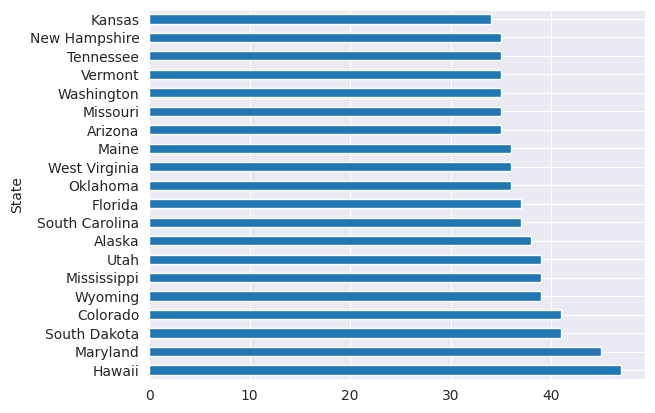

In [ ]:
states_by_accident[:20].plot(kind="barh")

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
highest_states_accident= states_by_accident[states_by_accident >=1000]
len(highest_states_accident)

0

In [ ]:
lowest_states_accident= states_by_accident[states_by_accident <1000]
len(lowest_states_accident)

50

<ipython-input-22-40cb5d0fca71>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lowest_states_accident)


<Axes: xlabel='count', ylabel='Density'>

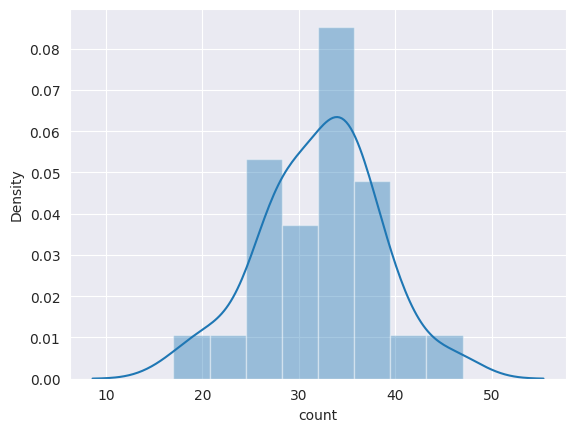

In [ ]:
sns.distplot(lowest_states_accident)

In [ ]:
len(lowest_states_accident) / len(states)

1.0

<Axes: xlabel='count', ylabel='Count'>

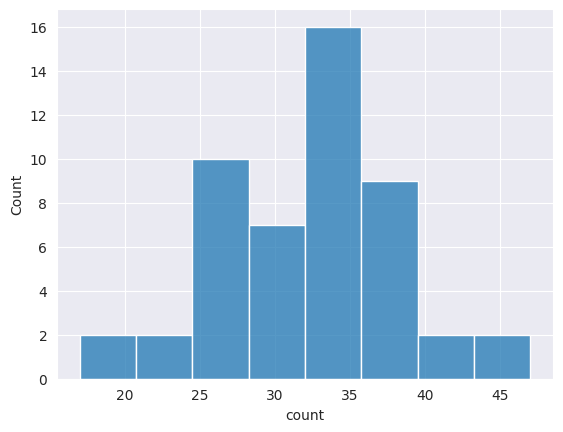

In [ ]:
sns.histplot(states_by_accident)

<Axes: ylabel='count'>

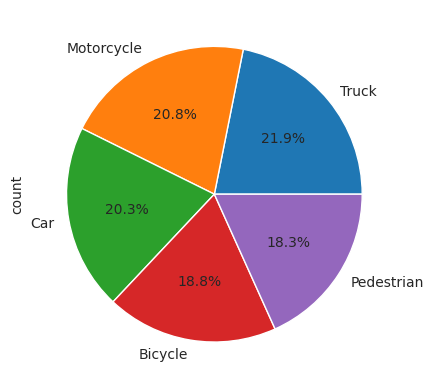

In [ ]:
df.Vehicle_Type.value_counts().plot(kind='pie',autopct='%1.1f%%')

<ipython-input-26-2975826a9ebe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Speed_Limit)


<Axes: xlabel='Speed_Limit', ylabel='Density'>

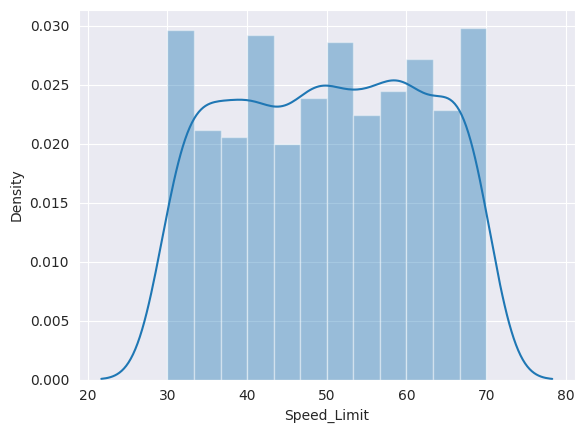

In [ ]:
sns.distplot(df.Speed_Limit)

In [ ]:
df['Weather_Conditions'].value_counts()

Weather_Conditions
Rainy     313
Snowy     302
Sunny     287
Stormy    285
Foggy     274
Name: count, dtype: int64

In [ ]:
df_num=df.select_dtypes(np.number)

In [ ]:
df_cat=df.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,State,50
1,Date,1610
2,Day_of_Week,7
3,Time_of_Day,1597
4,Weather_Conditions,6
5,Road_Conditions,5
6,Light_Conditions,4
7,Type_of_Road,5
8,Type_of_Junction,7
9,Type_of_Accident,7


<Axes: >

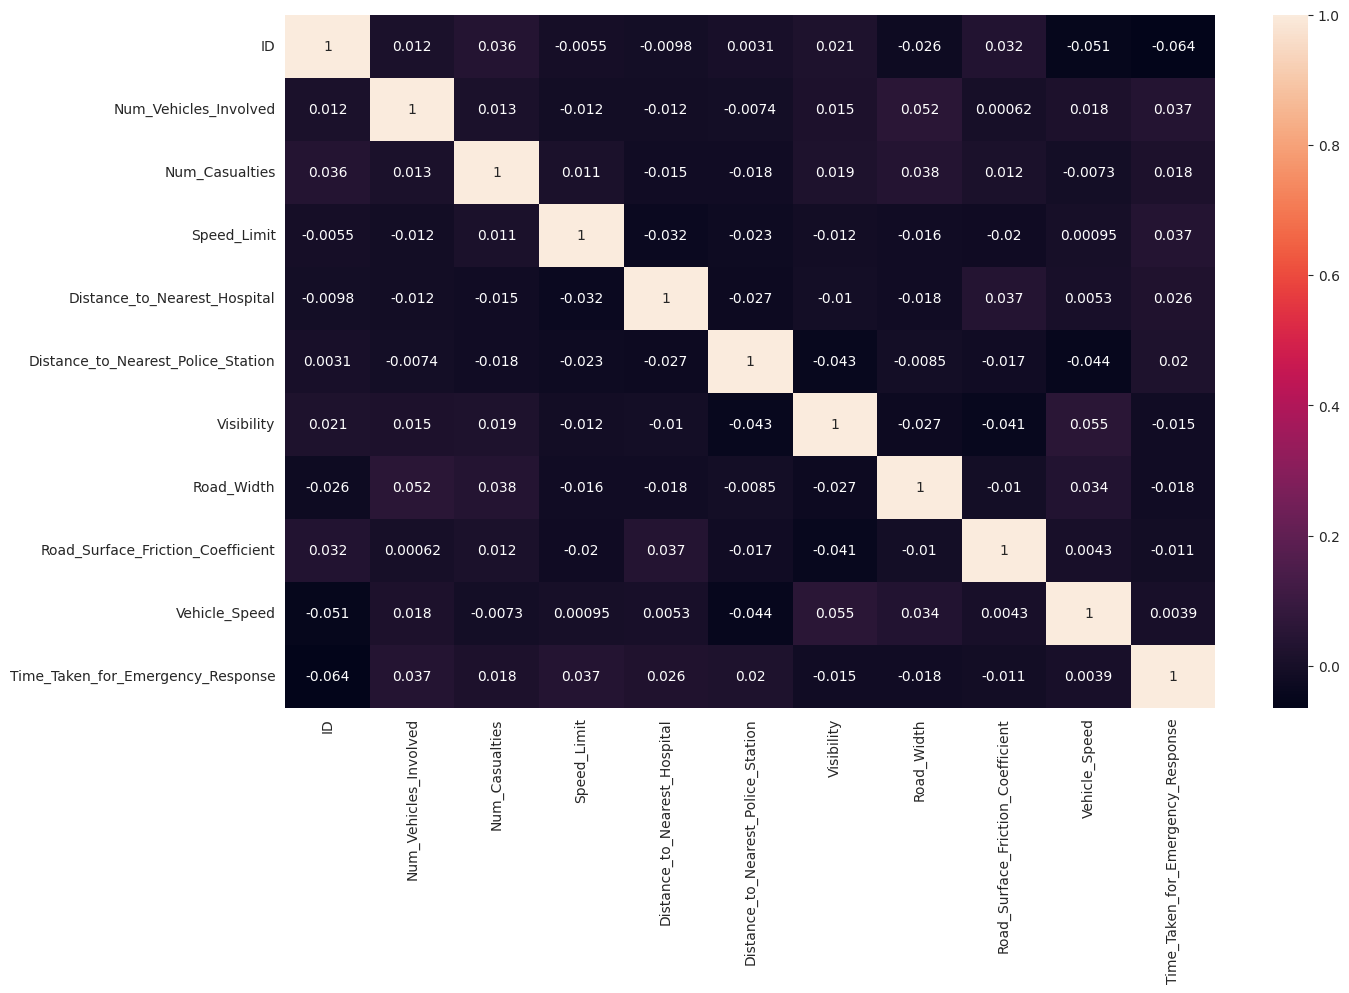

In [ ]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [44]:
label=LabelEncoder()
df['Weather_Conditions']=label.fit_transform(df['Weather_Conditions'])
df['Road_Conditions']=label.fit_transform(df['Road_Conditions'])
df['Light_Conditions']=label.fit_transform(df['Light_Conditions'])
df['Type_of_Road']=label.fit_transform(df['Type_of_Road'])

In [45]:
df.head()

,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433,Connecticut,2024-02-20 05:46:20,Tuesday,19:59:02,1,2,1,3,T-Junction,...,2,3,57.0,3.303606,3.139351,485.649011,4.886202,0.904971,45.0,25.152781
1,165434,Massachusetts,2024-01-09 05:08:31,Wednesday,21:28:51,4,2,1,1,Intersection,...,1,0,55.0,2.715327,3.634593,616.979936,4.677592,0.949236,41.0,23.163817
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,2,3,0,3,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
3,165436,Hawaii,2024-01-15 03:23:47,Sunday,16:51:02,2,1,1,3,Intersection,...,5,0,59.0,6.976968,2.334468,842.441019,4.351822,0.195811,NaN,6.595036
4,165437,Oklahoma,2024-02-10 10:17:29,Tuesday,14:19:19,0,1,3,2,T-Junction,...,2,0,53.0,3.724599,4.359620,905.620262,6.626862,0.954821,81.0,22.913128


<Axes: xlabel='Weather_Conditions', ylabel='Light_Conditions'>

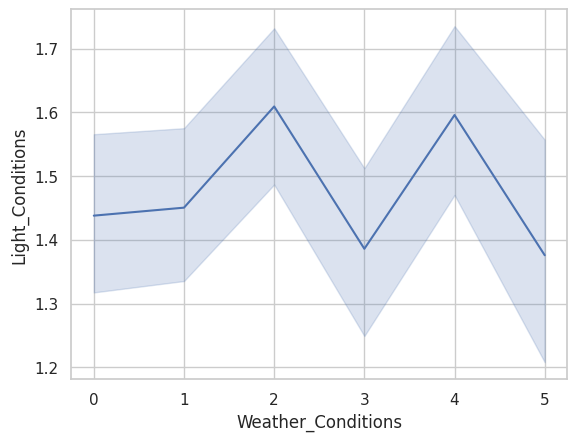

In [57]:
sns.lineplot(x="Weather_Conditions",y="Light_Conditions",data=df)